Enter the cascade path=/content/haarcascade_frontalface_default.xml
Enter the model path=/content/model.h5
Enter the image path=/content/drive/MyDrive/inputs/ang.jpg


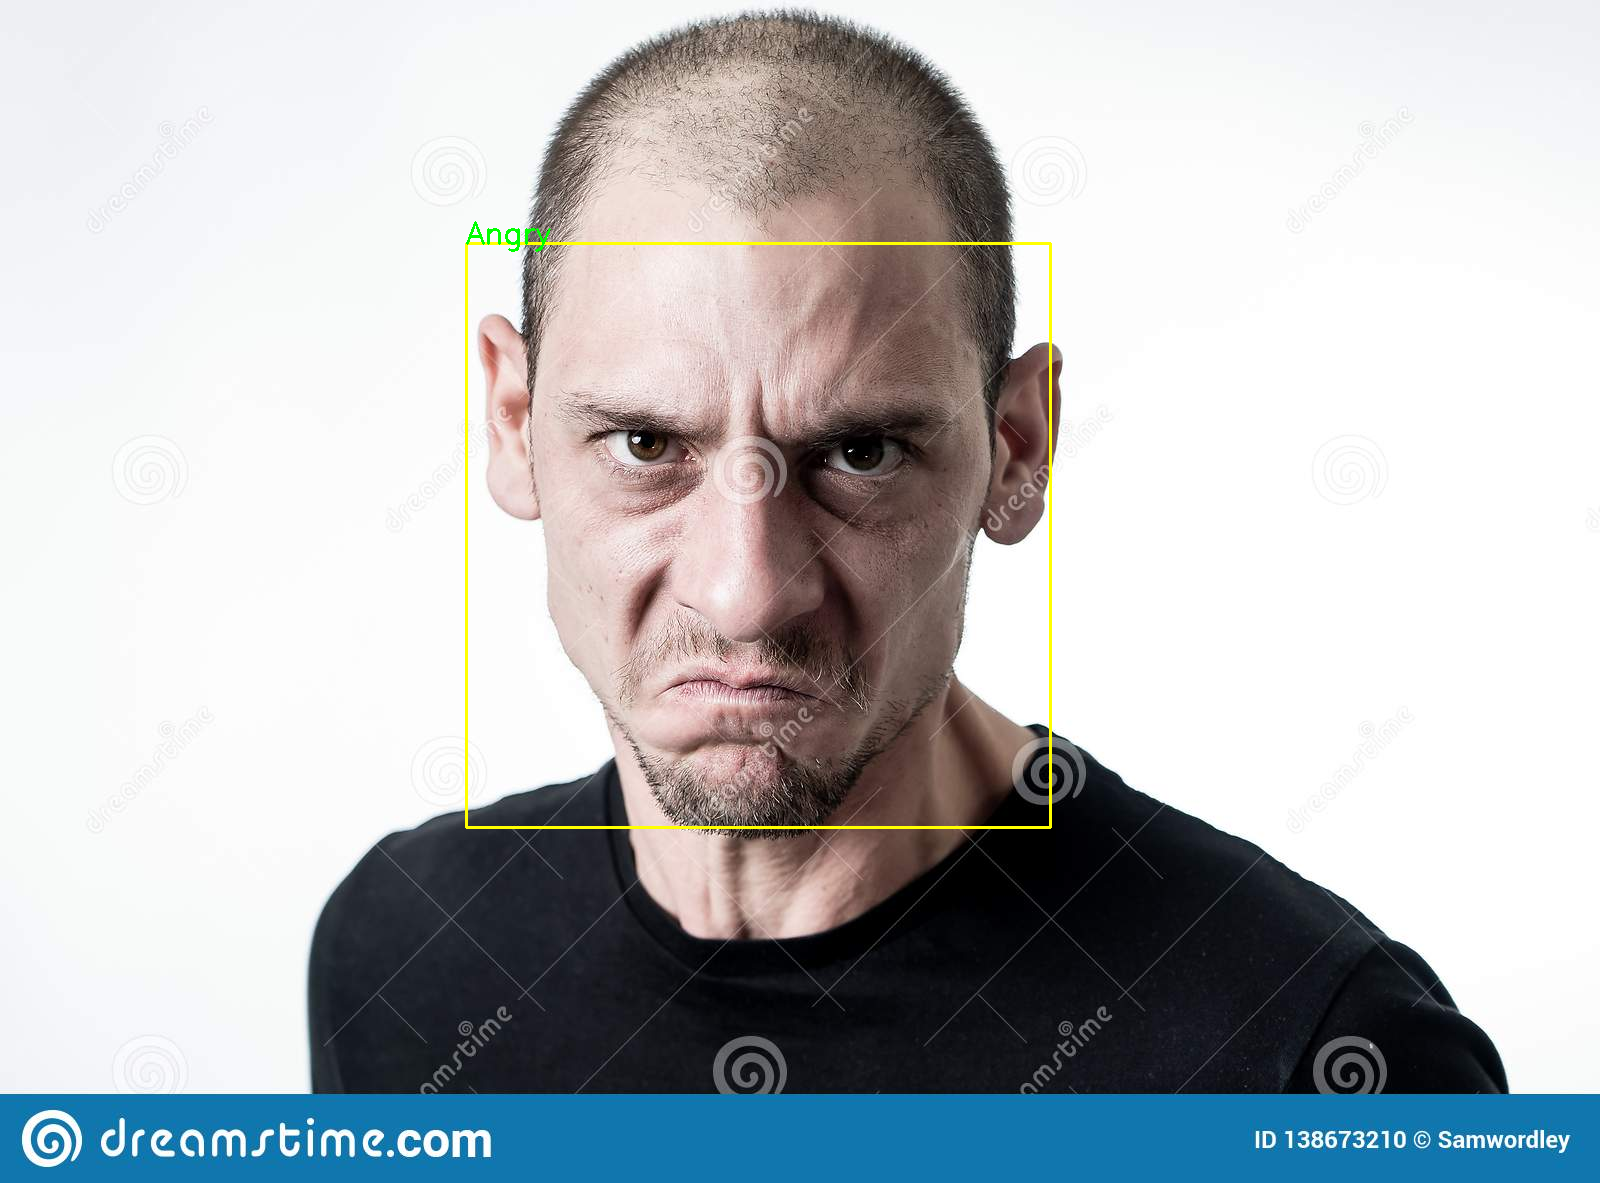

In [5]:

from google.colab.patches import cv2_imshow
from keras.models import load_model
from time import sleep
from tensorflow.keras.utils import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

cascadepath=input("Enter the cascade path=")
modelpath=input("Enter the model path=")
face_classifier = cv2.CascadeClassifier(cascadepath)
classifier =load_model(modelpath)

emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

image_path=input("Enter the image path=")
frame = cv2.imread(image_path)



labels = []
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(gray,1.3,5)

for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
cv2_imshow(
    
    
    frame)
cv2.imwrite(f"{label}.jpg",frame)
cv2.destroyAllWindows()




